In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("drawndata1.csv")

In [3]:
df.head(10)

,x,y,z
0,58.080365,225.699042,a
1,238.867357,247.456645,a
2,156.218212,286.588782,a
3,262.004361,284.251445,a
4,185.243183,308.187571,a
5,180.095699,289.569088,a
6,254.567182,288.434128,a
7,283.587488,305.608829,a
8,133.750000,311.215526,a
9,429.660811,265.006662,a


In [4]:
df.describe()

,x,y
count,252.000000,252.000000
mean,1139.961770,239.978154
std,843.670329,70.501751
min,-58.796124,-34.890298
25%,332.770064,207.827828
50%,1051.538393,241.449318
75%,1800.189092,282.049604
max,2880.070416,513.986501


In [28]:
X = df[['x','y']].values
print(f"X shape: {X.shape}")
print(f"X dimension: {X.ndim}")
print(f"df dimension: {df.ndim}")
y=df['z'] == "a"

X shape: (252, 2)
X dimension: 2
df dimension: 2


In [29]:
y[:5]

0    True
1    True
2    True
3    True
4    True
Name: z, dtype: bool

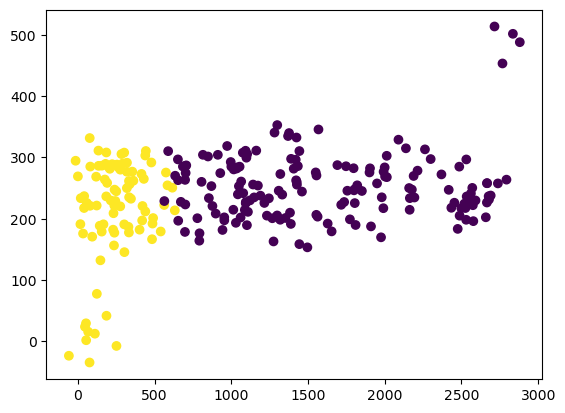

In [38]:
plt.scatter(X[:,0], X[:,1],c=y)

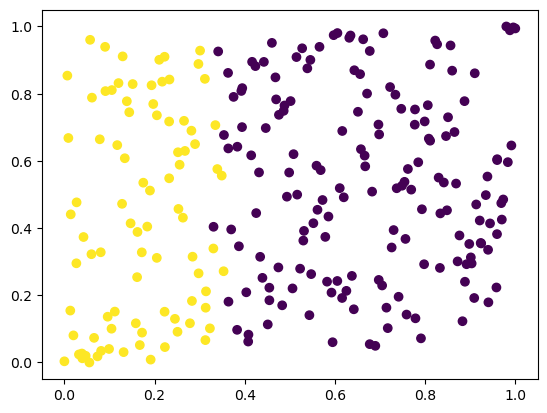

In [36]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

X_new = QuantileTransformer(n_quantiles=100).fit_transform(X)
plt.scatter(X_new[:,0], X_new[:,1], c=y)

In [46]:
def plot_output(scaler):
    pipe = Pipeline([
        ("scale", scaler), 
        ("model", KNeighborsClassifier(n_neighbors=20, weights='distance'))
    ])

    pred = pipe.fit(X,y).predict(X)

    plt.figure(figsize=(9,3))
    plt.subplot(131)
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.title("Original Data")
    plt.subplot(132)
    X_tfm = scaler.transform(X)
    plt.scatter(X_tfm[:,0], X_tfm[:,1], c=y)
    plt.title("Transformed Data")
    plt.subplot(133)
    X_new = np.concatenate([
        np.random.uniform(0,X[:,0].max(), (5000,1)),
        np.random.uniform(0, X[:,1].max(), (5000,1))
    ], axis=1)
    y_proba = pipe.predict_proba(X_new)
    plt.scatter(X_new[:,0], X_new[:,1], c=y_proba[:,1], alpha=0.7)
    plt.title("Predicted Data")

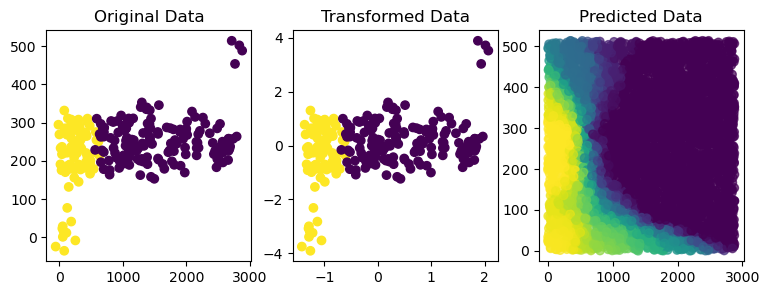

In [47]:
plot_output(scaler=StandardScaler())

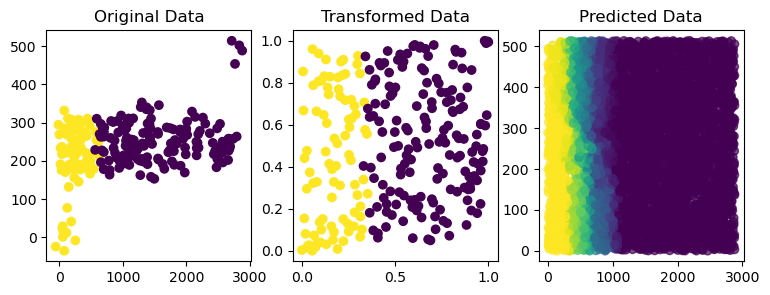

In [48]:
plot_output(scaler=QuantileTransformer(n_quantiles=100))

In [49]:
df = pd.read_csv("drawndata2.csv")
df.head()

,x,y,z
0,469.759355,453.574946,a
1,535.331819,435.221848,a
2,504.285526,437.767578,a
3,469.891398,368.371652,a
4,405.425622,403.141546,a


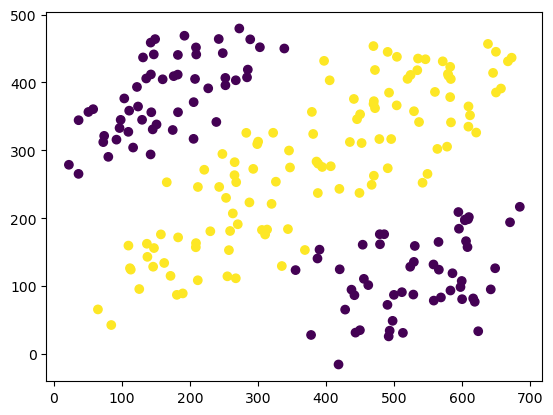

In [53]:
X = df[['x','y']].values
y = df['z'] == 'a'
plt.scatter(X[:,0], X[:,1], c=y)

In [58]:
arr = np.array(["low", "low", "hight", "medium"]).reshape(-1,1)
print(f"after reshape: {arr.shape}")
print(f"after reshape dimension: {arr.ndim}")
ar = np.array(["low", "low", "hight", "medium"])
print(f"before reshape: {ar.shape}")
print(f"before reshape dimension: {ar.ndim}")

after reshape: (4, 1)
after reshape dimension: 2
before reshape: (4,)
before reshape dimension: 1


In [59]:
from sklearn.preprocessing import OneHotEncoder

In [64]:
enc = OneHotEncoder(handle_unknown='ignore')
print(enc.fit_transform(arr))

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4 stored elements and shape (4, 3)>
  Coords	Values
  (0, 1)	1.0
  (1, 1)	1.0
  (2, 0)	1.0
  (3, 2)	1.0


In [65]:
enc.transform([['zero']])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 0 stored elements and shape (1, 3)>